In [1]:
#Import the required libraries and the dataset that we will use
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
(x_train,y_train),(x_test,y_test) = mnist.load_data() # the image is in the form (1,28,28)

In [2]:
#Preprocess the image
x_train = x_train.reshape(x_train.shape[0],28,28,1) #Add single channel for CONV (1,28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
#Define model, we will use CNN for image classification since its very powerful.

model = Sequential() #Base model
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                 activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [5]:
#Different optimzers. Not atting L2 since we have dropout
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)



In [6]:
model.compile(optimizer = optimizer, metrics=['accuracy'],loss='categorical_crossentropy')

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)         

In [13]:
#Parameters and Data Augmentation to use
epochs = 3
batch_size = 128

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [14]:
datagen.fit(x_train)

In [16]:
#and avoid local minima. If it is not improved in 3 epochs, reduce learning rate by 0.5
learning_rate_reduction = ReduceLROnPlateau(factor = 0.5,
                                           monitor = 'val_accuracy',
                                           verbose = 1,
                                           patience = 3,
                                            min_lr=0.00001)

In [17]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/3
468/468 - 151s - loss: 0.0540 - accuracy: 0.9853 - val_loss: 0.0255 - val_accuracy: 0.9940
Epoch 2/3
468/468 - 169s - loss: 0.0546 - accuracy: 0.9856 - val_loss: 0.0186 - val_accuracy: 0.9941
Epoch 3/3
468/468 - 146s - loss: 0.0593 - accuracy: 0.9848 - val_loss: 0.0188 - val_accuracy: 0.9951


In [18]:
model.save('mnist_model.h5')

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

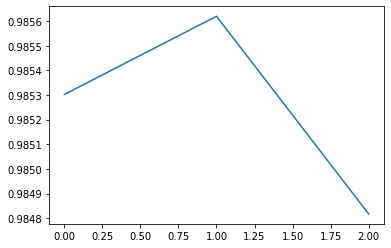

In [28]:
plt.plot(history.epoch,history.history['accuracy'])